In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
employees = ['EA', 'KR', 'KB', 'CP', 'MM', 'MC']
targets = [65, 45, 85, 45, 85, 70]
months = ['Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov',
         'Dec', 'Jan', 'Feb', 'Mar']

In [4]:
df = pd.DataFrame(list(zip(employees, targets)), columns=['Employees', months[0]])
df.set_index('Employees', inplace=True)
df

,Apr
Employees,
EA,65
KR,45
KB,85
CP,45
MM,85
MC,70


In [5]:
for month in months[1:-5]:
    random_data = [random.randrange(60,140)/100 for employee in df.index]
    df[month] = df['Apr'] * random_data
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65,51.35,65.00,70.20,64.35,77.35,63.7
KR,45,37.35,49.05,47.25,33.75,62.10,44.1
KB,85,69.70,87.55,57.80,111.35,108.80,110.5
CP,45,60.75,58.50,41.85,50.85,50.85,57.6
MM,85,79.05,71.40,99.45,99.45,109.65,115.6
MC,70,91.70,63.00,64.40,67.20,42.70,54.6


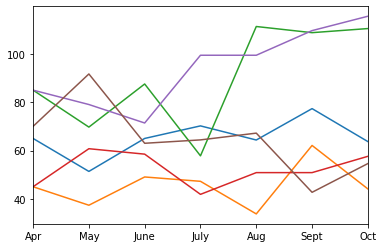

In [6]:
df.T.plot(legend=False)

In [7]:
habitat_avg = df.loc[['EA', 'KR', 'KB']].mean()
habitat_avg

Apr     65.000000
May     52.800000
June    67.200000
July    58.416667
Aug     69.816667
Sept    82.750000
Oct     72.766667
dtype: float64

In [8]:
df.loc['Habitat'] = habitat_avg.T
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.0,51.35,65.00,70.200000,64.350000,77.35,63.700000
KR,45.0,37.35,49.05,47.250000,33.750000,62.10,44.100000
KB,85.0,69.70,87.55,57.800000,111.350000,108.80,110.500000
CP,45.0,60.75,58.50,41.850000,50.850000,50.85,57.600000
MM,85.0,79.05,71.40,99.450000,99.450000,109.65,115.600000
MC,70.0,91.70,63.00,64.400000,67.200000,42.70,54.600000
Habitat,65.0,52.80,67.20,58.416667,69.816667,82.75,72.766667


In [9]:
df.loc['Water'] = df.loc[['CP', 'MM', 'MC']].mean()
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.000000,51.350000,65.00,70.200000,64.350000,77.350000,63.700000
KR,45.000000,37.350000,49.05,47.250000,33.750000,62.100000,44.100000
KB,85.000000,69.700000,87.55,57.800000,111.350000,108.800000,110.500000
CP,45.000000,60.750000,58.50,41.850000,50.850000,50.850000,57.600000
MM,85.000000,79.050000,71.40,99.450000,99.450000,109.650000,115.600000
MC,70.000000,91.700000,63.00,64.400000,67.200000,42.700000,54.600000
Habitat,65.000000,52.800000,67.20,58.416667,69.816667,82.750000,72.766667
Water,66.666667,77.166667,64.30,68.566667,72.500000,67.733333,75.933333


In [10]:
#Projected Monthly Utilization = If in month, projected utilization, else actual utilization
projected = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
#Projected Yearly Utilization = weighted average of all utilization

In [11]:
projected

""
Employees
EA
KR
KB
CP
MM
MC
Habitat
Water


In [12]:
projected['Apr'] = df['Apr']
projected

,Apr
Employees,
EA,65.000000
KR,45.000000
KB,85.000000
CP,45.000000
MM,85.000000
MC,70.000000
Habitat,65.000000
Water,66.666667


In [13]:
df.mean(axis=1)

Employees
EA         65.278571
KR         45.514286
KB         90.100000
CP         52.200000
MM         94.228571
MC         64.800000
Habitat    66.964286
Water      70.409524
dtype: float64

In [14]:
df.iloc[:,-1]

Employees
EA          63.700000
KR          44.100000
KB         110.500000
CP          57.600000
MM         115.600000
MC          54.600000
Habitat     72.766667
Water       75.933333
Name: Oct, dtype: float64

In [15]:
for month in months:
    if month in df.columns:
        projected[month] = df[month]
    else:
        projected[month] = df.iloc[:,-1]
projected

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,51.350000,65.00,70.200000,64.350000,77.350000,63.700000,63.700000,63.700000,63.700000,63.700000,63.700000
KR,45.000000,37.350000,49.05,47.250000,33.750000,62.100000,44.100000,44.100000,44.100000,44.100000,44.100000,44.100000
KB,85.000000,69.700000,87.55,57.800000,111.350000,108.800000,110.500000,110.500000,110.500000,110.500000,110.500000,110.500000
CP,45.000000,60.750000,58.50,41.850000,50.850000,50.850000,57.600000,57.600000,57.600000,57.600000,57.600000,57.600000
MM,85.000000,79.050000,71.40,99.450000,99.450000,109.650000,115.600000,115.600000,115.600000,115.600000,115.600000,115.600000
MC,70.000000,91.700000,63.00,64.400000,67.200000,42.700000,54.600000,54.600000,54.600000,54.600000,54.600000,54.600000
Habitat,65.000000,52.800000,67.20,58.416667,69.816667,82.750000,72.766667,72.766667,72.766667,72.766667,72.766667,72.766667
Water,66.666667,77.166667,64.30,68.566667,72.500000,67.733333,75.933333,75.933333,75.933333,75.933333,75.933333,75.933333


In [16]:
projected.loc[:,'Apr': 'July']

,Apr,May,June,July
Employees,,,,
EA,65.000000,51.350000,65.00,70.200000
KR,45.000000,37.350000,49.05,47.250000
KB,85.000000,69.700000,87.55,57.800000
CP,45.000000,60.750000,58.50,41.850000
MM,85.000000,79.050000,71.40,99.450000
MC,70.000000,91.700000,63.00,64.400000
Habitat,65.000000,52.800000,67.20,58.416667
Water,66.666667,77.166667,64.30,68.566667


In [17]:
projected_y = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
for month in months:
    projected_y[month] = projected.loc[:,months[0]:month].mean(axis=1)
projected_y

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,58.175000,60.450000,62.887500,63.180000,65.541667,65.278571,65.081250,64.927778,64.805000,64.704545,64.620833
KR,45.000000,41.175000,43.800000,44.662500,42.480000,45.750000,45.514286,45.337500,45.200000,45.090000,45.000000,44.925000
KB,85.000000,77.350000,80.750000,75.012500,82.280000,86.700000,90.100000,92.650000,94.633333,96.220000,97.518182,98.600000
CP,45.000000,52.875000,54.750000,51.525000,51.390000,51.300000,52.200000,52.875000,53.400000,53.820000,54.163636,54.450000
MM,85.000000,82.025000,78.483333,83.725000,86.870000,90.666667,94.228571,96.900000,98.977778,100.640000,102.000000,103.133333
MC,70.000000,80.850000,74.900000,72.275000,71.260000,66.500000,64.800000,63.525000,62.533333,61.740000,61.090909,60.550000
Habitat,65.000000,58.900000,61.666667,60.854167,62.646667,65.997222,66.964286,67.689583,68.253704,68.705000,69.074242,69.381944
Water,66.666667,71.916667,69.377778,69.175000,69.840000,69.488889,70.409524,71.100000,71.637037,72.066667,72.418182,72.711111


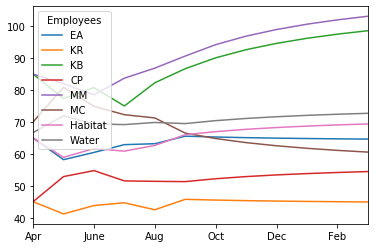

In [18]:
projected_y.T.plot()

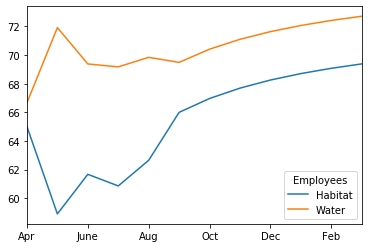

In [19]:
projected_y.loc[['Habitat', 'Water'],:].T.plot()

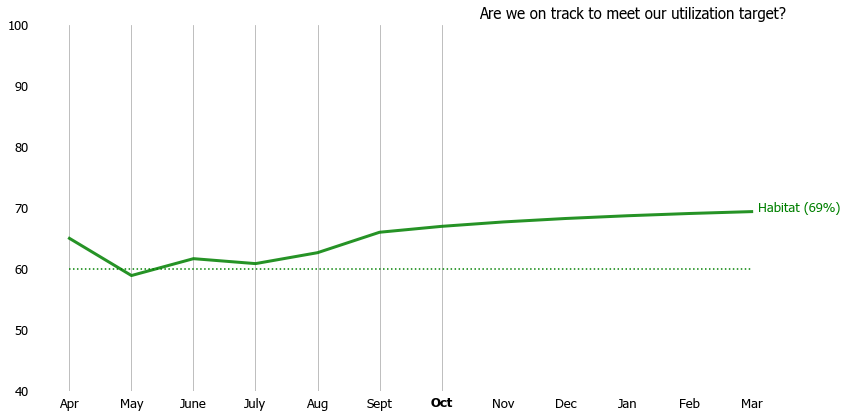

In [20]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
# ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
# ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, zorder=10)
# ax.bar(np.arange(12), habitat_max, width=.05, color='green', alpha=.2)
# ax.bar(np.arange(12), habitat_min, color='white')

# water_min = data[['CP','MM','MC']].min(axis=1)
# water_max = data[['CP','MM','MC']].max(axis=1)
# ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
# ax.plot([water_target]*12, color=water_color, linestyle='dotted')

# ax.plot(data[['EA','KR','KB']], linestyle='', marker='_', color='green', alpha=.6)

# ax.axvline(6, color='grey', alpha=.4, linewidth=3)

# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(40, 100)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.xaxis.grid(True)

# Axes ticks
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
# plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color,
#         fontsize=12)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

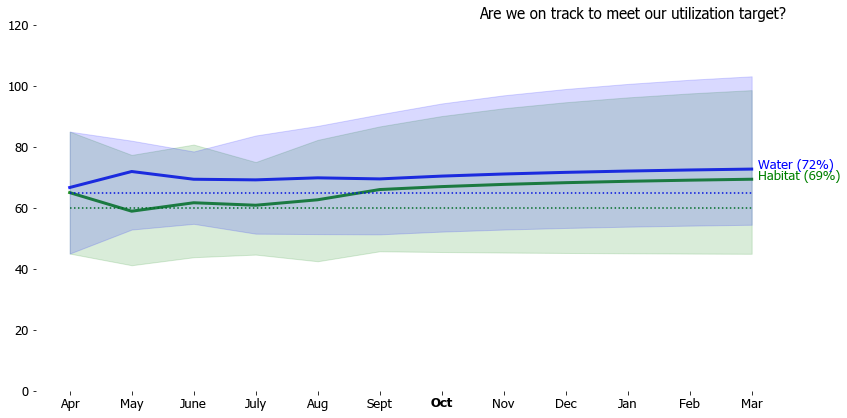

In [21]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, 
                zorder=10)

water_min = data[['CP','MM','MC']].min(axis=1)
water_max = data[['CP','MM','MC']].max(axis=1)
ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15,
               zorder=10)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax.plot([water_target]*12, color=water_color, linestyle='dotted')


# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(0,120)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

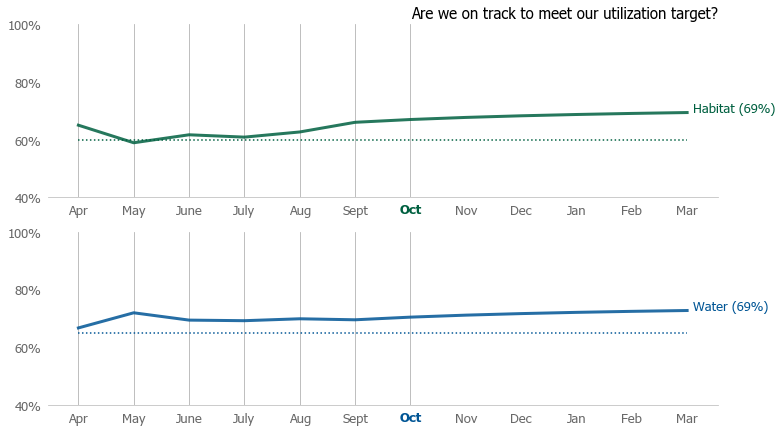

In [22]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6

water_color= '#005595'
habitat_color= '#006040'
water_target = 65
habitat_target = 60

fig, axes = plt.subplots(2,1,figsize=[12,7])
ax1 = axes[0]
ax2 = axes[1]

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax1.axes.axvline(i, color='white', linewidth=2)
    ax2.axes.axvline(i, color='white', linewidth=2)

# Plot data
ax1.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax2.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)

# Plot targets
ax1.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax2.plot([water_target]*12, color=water_color, linestyle='dotted')

# Set title
ax1.set_title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Adjust axes ranges
ax1.set_ylim(40, 100)
ax2.set_ylim(40, 100)

# Adjust number of labels
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))

# Format labels as percent
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Add grid Lines
ax1.yaxis.grid(False)
ax1.xaxis.grid(True)
ax2.yaxis.grid(False)
ax2.xaxis.grid(True)

# Customize grid lines
ax1.axes.grid(axis='x', linestyle='-')
ax2.axes.grid(axis='x', linestyle='-')

# Set below graph objects
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

# Remove Axes ticks
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Recolor axis labels
ax1.tick_params(colors='dimgrey')
ax2.tick_params(colors='dimgrey')

# Remove axes spines
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_color('silver')

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_color('silver')

# Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
ax1.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
ax2.text(11.1, water_value, f'Water ({int(habitat_value)}%)', color=water_color)

# Indicate current month
ax1.get_xticklabels()[current_month].set_fontweight('bold')
ax1.get_xticklabels()[current_month].set_color(habitat_color) #Black draws too much attention as new color
ax2.get_xticklabels()[current_month].set_fontweight('bold')
ax2.get_xticklabels()[current_month].set_color(water_color)

plt.show()

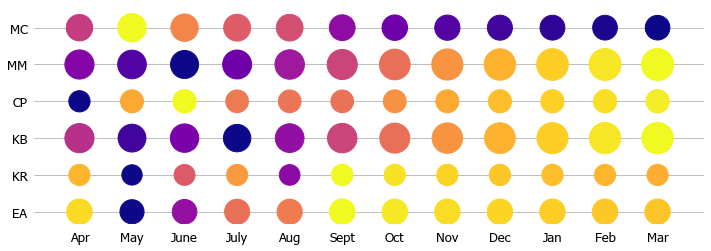

In [45]:
fig, ax3 = plt.subplots(figsize=[12,4])

# colorbar = ax3.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)

for idx, emp in enumerate(employees):
    x = data.index
    y = [idx] * len(data.index)
    size = data[emp]
    color = data[emp]
    ax3.scatter(x, y, s=size*10, c=color, cmap='plasma')
#     ax.scatter(x, y, s=size, facecolors='none', edgecolors='blue')

ax3.set_yticklabels(['']+employees+[''])  # top and bottom ticks are unused?

ax3.yaxis.grid(True)
ax3.set_axisbelow(True)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax3.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# ax3.tick_params(axis='x', pad=30)

# fig.colorbar(ax=ax3)

plt.show()